# PS 88 Week 11 Class Notebook

In [ ]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Here is an example with quadratic data

In [ ]:
x = np.random.normal(1,1,size=100)
y  = 2*x - 3*x**2 + np.random.normal(0,1, size=100)
dat = pd.DataFrame(data={"x":x, "y":y})
dat

In [ ]:
sns.regplot(x="x", y="y", data=dat, ci=0)

In [ ]:
smf.ols('y ~ x', data=dat).fit().summary()

In [ ]:
sns.regplot(x='x', y='y', data=dat, order =2, ci=0)

We can include a quadratic term in our formula by ading a `+ I(x**2)` term in our regression formula

In [ ]:
quadm = 
quadm.summary()

Checking that these regression coefficients are correct. Recall we can use `.params` to get the coefficients

In [ ]:
quadm.params

In [ ]:
sns.scatterplot(x='x', y='y', data=dat)
xplot = np.arange(-3, 3, .01)
yplot = quadm.params[0] + quadm.params[1]*xplot + quadm.params[2]*xplot**2
plt.plot(xplot,yplot)

Here is a trickier example which uses a since function. We can approximate this using a polynomial with enough terms (remember this from calculus?)

In [ ]:
y2 = x + .5*x**3 -  10*np.sin(2*x) + np.random.normal(0, 1, 100)
dat['y2'] = y2

## Interaction terms

Bringing back our data on ACA voting and the 2010 midterms

In [ ]:
hcr_mid = pd.read_stata("hcr_midterm.dta")
hcr_mid

Recall we want to focus on democrats who were in competitive districts

In [50]:
hcr_mid = hcr_mid[(hcr_mid["dem_n"] > 0) & (hcr_mid["party"]=="D")]
hcr_mid

,dem,rep,rpt,state,cd,party,hcr_yes,obama,dem_n,hcr_obama
2,49%,51%,100%,AL,2,D,0,36,49.0,0.0
5,42%,58%,100%,AL,5,D,0,38,42.0,0.0
7,72%,28%,99%,AL,7,D,0,72,72.0,0.0
8,43%,52%,99%,AR,1,D,1,38,43.0,38.0
9,38%,58%,99%,AR,2,D,1,44,38.0,44.0
...,...,...,...,...,...,...,...,...,...,...
425,69%,30%,100%,WI,4,D,1,75,69.0,75.0
428,44%,52%,100%,WI,7,D,1,56,44.0,56.0
429,45%,55%,99%,WI,8,D,1,54,45.0,54.0
430,50%,50%,100%,WV,1,D,1,42,50.0,42.0


The multivariate regression we considered before

In [52]:
ols_mv = smf.ols('dem_n ~ hcr_yes + obama', data=hcr_mid).fit()
ols_mv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dem_n   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     657.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          9.98e-101
Time:                        07:56:23   Log-Likelihood:                -779.96
No. Observations:                 255   AIC:                             1566.
Df Residuals:                     252   BIC:                             1577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4892      1.526      2.943      0.004       1.485       7.494
hcr_yes       -5.3155      1.063     -4.999      0.000      -7.410      -3.221
obama          0.9510      0.029     33.113      0.000       0.894       1.008
==============================================================================
Omnibus:                        9.991   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.235
Skew:                           0.331   Prob(JB):                      0.00220
Kurtosis:                       3.844   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualizing this regression

In [53]:
ols_mv.params

Intercept    4.489197
hcr_yes     -5.315472
obama        0.951048
dtype: float64

In [54]:
hcr_mid_y = hcr_mid[hcr_mid["hcr_yes"] == 1]
hcr_mid_n = hcr_mid[hcr_mid["hcr_yes"] == 0]

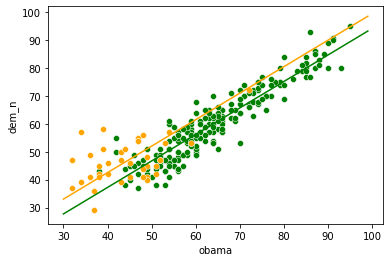

In [55]:
sns.scatterplot(x='obama', y='dem_n', data=hcr_mid_y, color="green")
sns.scatterplot(x='obama', y='dem_n', data=hcr_mid_n, color="orange")
xrange = np.arange(30, 100)
plt.plot(xrange, ols_mv.params[0] + xrange*ols_mv.params[2], color="orange")
plt.plot(xrange, ols_mv.params[0] + ols_mv.params[1] + xrange*ols_mv.params[2], color="green")

Now let's add an interaction term. We can do this by using "var1:var2" to capture the interaction term between these variables.

In [ ]:
ols_int = smf.ols('dem_n ~ hcr_yes + obama + hcr_yes:obama', data=hcr_mid).fit()
ols_int.summary()

To visualize this, we can draw separate best fit lines for those who voted yes and no

<AxesSubplot:xlabel='obama', ylabel='dem_n'>

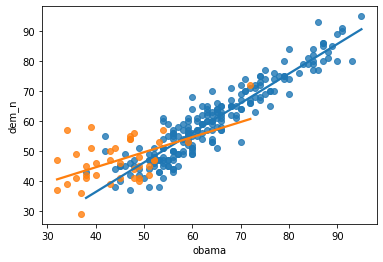

In [56]:
sns.regplot(x='obama', y='dem_n', data=hcr_mid_y, ci=0)
sns.regplot(x='obama', y='dem_n', data=hcr_mid_n, ci=0)

In [57]:
ols_int.params

Intercept        24.410139
hcr_yes         -27.607541
obama             0.504030
hcr_yes:obama     0.483968
dtype: float64

Checking that our interactive regression model model gives the graph

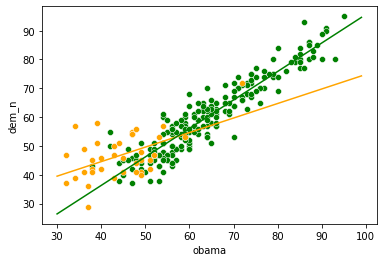

In [59]:
sns.scatterplot(x='obama', y='dem_n', data=hcr_mid_y, color="green")
sns.scatterplot(x='obama', y='dem_n', data=hcr_mid_n, color="orange")
xrange = np.arange(30, 100)
plt.plot(xrange, ols_int.params[0] + xrange*ols_int.params[2], color="orange")
plt.plot(xrange, ols_int.params[0] + ols_int.params[1]+ 
         (ols_int.params[2] + ols_int.params[3])*xrange, color="green")

## Legal drinking

In [ ]:
mlda = pd.read_stata("AEJfigs.dta")
mlda

In [ ]:
sns.scatterplot(x='agecell', y='all', data=mlda)
plt.axvline(21)

Here is the "close to legal drinking age" analysis, where we only consider people within a half year of being 21.

In [ ]:
width = .5
close_under = 1*(mlda['agecell'] > 21 - width)*(mlda['agecell'] < 21)
close_over = 1*(mlda['agecell'] < 21 + width)*(mlda['agecell'] >= 21)
np.mean(mlda.loc[close_under==1, 'all']), np.mean(mlda.loc[close_over==1, 'all'])

In [ ]:
# Change the width

And now the visual version of the regression discontinuity. Not we make two separate `sns.regplot`s and the automatically get placed on the same graph.

In [ ]:
mlda['diff21'] = mlda['agecell'] - 21

In [ ]:
mlda_under = mlda[mlda['diff21'] < 0]
mlda_over = mlda[mlda['diff21'] >=0]
sns.regplot(x='diff21',y='all', data=mlda_under)
sns.regplot(x='diff21',y='all', data=mlda_over)
plt.axvline(0, linestyle=":")

Here is the regression version

In [ ]:
mlda_rd1 = smf.ols('all ~ diff21 + over + diff21:over', data=mlda).fit()
mlda_rd1.summary()

We can add more polynomial terms with the `order=` argument

In [ ]:
mlda_under = mlda[mlda['diff21'] < 0]
mlda_over = mlda[mlda['diff21'] >=0]
sns.regplot(x='diff21',y='all', data=mlda_under, order=5)
sns.regplot(x='diff21',y='all', data=mlda_over, order=5)
plt.axvline(0, linestyle=":")

In [ ]:
mlda['over'] = 1*(mlda['agecell'] >= 21)

In [ ]:
smf.ols('all~over + diff21+ I(diff21**2) + diff21:over + over:I(diff21**2)',data=mlda).fit().summary()

Another nice informative test we can do is look at trends in mortality *unrelated* to the kinds of deaths caused by drinking. These are often lumped together as "internal" causes (see the book for more detail)

In [ ]:
sns.scatterplot(x='agecell', y='internal', data=mlda)
plt.axvline(21)